# Lista 09 - Fundamentos Estatísticos para Ciência dos Dados A
- Aluno: Thiago Martin Poppe
- Matrícula: 2017014324

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Exercícios da seção 8.1

## Questão 01)
O objetivo do exercício é inteiramente análogo ao de reconhecimento de faces. Queremos um método de classificação de novas imagens de dígitos manuscritos. Assim, você deverá:

- Usando um conjunto de treinamento, criar uma regra de classificação de novas imagens de dígitos. Use os primeiros $k$ autovetores da matriz de covariância entre os pixels para fazer esta regra de classificação. Você deve fazer seus cálculos com $k = 5, 10, 15, 20$.

In [2]:
# Leitura dos dados de treinamento
# As imagens possuem tamanho 16x16 pixels (256 pixels)
# O primeiro valor de cada linha do arquivo representa a classe daquela imagem
with open('zip_code_dataset/zip.train') as ftrain:
    train_data = np.loadtxt(ftrain)
    train_labels = train_data[:, 0].astype(int)
    train_images = train_data[:, 1:]

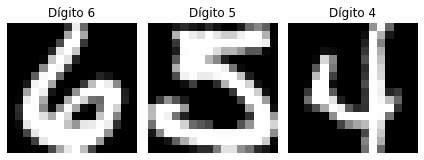

In [3]:
# Visualizando as 3 primeiras imagens do conjunto de treino
n_images = 3
fig, axs = plt.subplots(ncols=n_images)

for i in range(n_images):
    axs[i].imshow(train_images[i].reshape((16,16)), cmap='gray')
    axs[i].set_title('Dígito {}'.format(train_labels[i]))
    axs[i].axis('off')

fig.tight_layout()

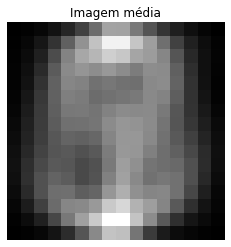

In [4]:
# Iremos obter agora a imagem média e visualizá-la
mean_image = np.mean(train_images, axis=0)

plt.title('Imagem média')
plt.imshow(mean_image.reshape((16,16)), cmap='gray')
plt.axis('off')
plt.show()

In [7]:
# O próximo passo é obtermos os autovalores da matriz de covariâncias
train_centralized_images = train_images - mean_image
covariance_matrix = np.cov(train_centralized_images.T)

print('Formato da matriz de covariâncias:', covariance_matrix.shape)

Formato da matriz de covariâncias: (256, 256)


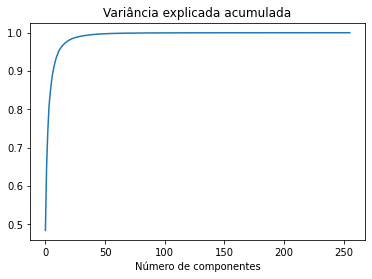

In [63]:
# Através dessa matriz iremos computar os componentes principais
# Iremos primeiramente computar todos os componentes principais para analisarmos
# a variância explicada como feito em sala de aula
pca = PCA(n_components=256)
pca.fit(covariance_matrix)

# Podemos perceber pelo plot que de fato nós conseguimos explicar
# boa parte da variânca dos dados com poucos componentes!!
plt.title('Variância explicada acumulada')
plt.xlabel('Número de componentes')
plt.plot(np.cumsum(pca.explained_variance_) / sum(pca.explained_variance_))
plt.show()

In [148]:
# Podemos agora usar K componentes principais para realizar a classificação de um dígito!

# Lendo os dados de teste
with open('zip_code_dataset/zip.test') as ftest:
    test_data = np.loadtxt(ftest)
    test_labels = test_data[:, 0].astype(int)
    test_images = test_data[:, 1:]

# Iremos criar um dicionário para guardas as predições para cada valor de K
predictions = {}
for k in [5, 10, 15, 20]:
    # Criando PCA com K componentes e aprendendo com a matriz de covariâncias
    pca = PCA(n_components=k)
    pca.fit(covariance_matrix)
    
    # Obtendo os coeficientes de cada conjunto (treino e teste)
    # Para isso, iremos usar a função transform, realizando os cálculos vistos em sala
    train_coef = pca.transform(train_images)
    test_coef = pca.transform(test_images)
    
    # Obtendo a média dos coeficientes para cada classe no treino
    mean_coefs = np.array([
        np.mean(train_coef[train_labels == digit], axis=0) for digit in range(10)
    ])
    
    # Obtendo as predições para cada dado no conjunto de teste
    # Iremos escolher a classe que possuir o coeficiente médio mais próximo!
    preds = []
    predictions[k] = np.array([
        np.argmin(np.mean((mean_coefs - coef)**2, axis=1)) for coef in test_coef
    ])

Predição para k=5: 1
Predição para k=10: 1
Predição para k=15: 1
Predição para k=20: 1


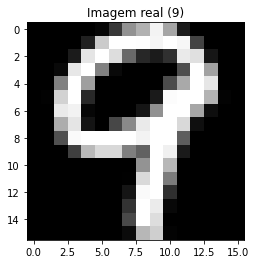

In [153]:
# Podemos observar as predições para a primeira imagem dos dados de teste
# Veremos que com 5 componentes nós teremos um erro!
for k in [5, 10, 15, 20]:
    print('Predição para k={}: {}'.format(k, predictions[k][42]))
    
plt.title('Imagem real ({})'.format(test_labels[0]))
plt.imshow(test_images[0].reshape((16,16)), cmap='gray')
plt.show()

- Usando apenas a amostra de TESTE, crie uma tabela de contingência $10 \times 10$ de confusão $C$. Nesta matriz $C$ as linhas representam a classe verdadeira do dígito (de 0 a 9) e a coluna a classe em que ele foi alocado. Na entrada $C_{ij}$ você deve colocar o número de itens (ou imagens) que caíram naquela categoria cruzada. Crie esta tabela com os quatro valores distintos de $k = 5, 10, 15, 20$.

## Questão 02)

# Exercícios da seção 8.2

## Questão 01)